# Facilitated Machine Learning Models for Karyotyping in the Patients with Chromosomal Abnormalities: Retrospective Study

- **Chuan Yang**, MD, PhD Student
- Mentor: **Yanyan Zhao**, MD, PhD
- Shengjing Hospital of China Medical University

# Chr 5 vs Chr 5p14

# Modules

In [1]:
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sb

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
from sklearn.model_selection import KFold

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow import keras

from os import walk

import time
import datetime

import json

%matplotlib inline

C:\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


In [2]:
iterationNumber = 5

# 1. Read the File to Acquire the Filename

In [3]:
with open('data_X_train_name.json') as json_file:
    X_train_name = json.load(json_file)
X_train_name

{'chr_05': {'0': ['D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_05\\173550-del(5)(p14)-10L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_05\\173550-del(5)(p14)-11L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_05\\173550-del(5)(p14)-12L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_05\\173550-del(5)(p14)-13L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_05\\173550-del(5)(p14)-15L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_05\\173550-del(5)(p14)-16L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_05\\173550-del(5)(p14)-17R.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_05\\173550-del(5)(p14)-18L.bmp',
   'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_05\\173550

In [4]:
with open('data_X_test_name.json') as json_file:
    X_test_name = json.load(json_file)
X_test_name['chr_05']['0']

['D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_05\\173550-del(5)(p14)-14L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_05\\173550-del(5)(p14)-20L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_05\\173550-del(5)(p14)-25L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_05\\173550-del(5)(p14)-27L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_05\\173550-del(5)(p14)-36L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_05\\173550-del(5)(p14)-3L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_05\\173550-del(5)(p14)-6L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_05\\173550-del(5)(p14)-9L.bmp',
 'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_05\\181558-10.jpg.5L.bmp',
 'D:\\Users\\Chuan\

In [5]:
with open('data_theWhole.json') as json_file:
    theWhole = json.load(json_file)
theWhole

{'chr_05': ['D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_05\\173550-del(5)(p14)-10L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_05\\173550-del(5)(p14)-11L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_05\\173550-del(5)(p14)-12L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_05\\173550-del(5)(p14)-13L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_05\\173550-del(5)(p14)-14L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_05\\173550-del(5)(p14)-15L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_05\\173550-del(5)(p14)-16L.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_05\\173550-del(5)(p14)-17R.bmp',
  'D:\\Users\\Chuan\\Documents\\Database\\Karyotypes\\Arrangement_Merged\\chr_05\\173550-del(5)(p14)-1

# 3. Iteration

## 3.1 Image Input

### 3.1.x Display the Split Method

In [6]:
type(X_train_name)

dict

In [7]:
X_train_name.keys()

dict_keys(['chr_05', 'chr_5_p14_deletion'])

In [8]:
file_k_fold = open('KFold_Round_'+str(iterationNumber)+'.txt', 'w')

print('Iteration No. ', iterationNumber)
file_k_fold.write('Iteration No. %s\n\n' % iterationNumber)


for chrNo in theWhole.keys():
    print(chrNo)
    file_k_fold.write('%s\n' % chrNo)
    print('   Train: ')
    file_k_fold.write('Train: \n')
    for item in X_train_name[chrNo][str(iterationNumber)]:
        print('       ', item.split('\\')[-1])
        file_k_fold.write('      %s\n' % item.split('\\')[-1])
    print('   Test: ')
    file_k_fold.write('Test: \n')
    for item in X_test_name[chrNo][str(iterationNumber)]:
        print('       ', item.split('\\')[-1])
        file_k_fold.write('      %s\n' % item.split('\\')[-1])
    file_k_fold.write('\n')
        
file_k_fold.close()

Iteration No.  5
chr_05
   Train: 
        173550-del(5)(p14)-10L.bmp
        173550-del(5)(p14)-12L.bmp
        173550-del(5)(p14)-14L.bmp
        173550-del(5)(p14)-15L.bmp
        173550-del(5)(p14)-16L.bmp
        173550-del(5)(p14)-17R.bmp
        173550-del(5)(p14)-19L.bmp
        173550-del(5)(p14)-1_L.bmp
        173550-del(5)(p14)-20L.bmp
        173550-del(5)(p14)-21L.bmp
        173550-del(5)(p14)-22L.bmp
        173550-del(5)(p14)-23L.bmp
        173550-del(5)(p14)-25L.bmp
        173550-del(5)(p14)-26L.bmp
        173550-del(5)(p14)-27L.bmp
        173550-del(5)(p14)-28L.bmp
        173550-del(5)(p14)-29L.bmp
        173550-del(5)(p14)-2L.bmp
        173550-del(5)(p14)-31L.bmp
        173550-del(5)(p14)-33L.bmp
        173550-del(5)(p14)-35L.bmp
        173550-del(5)(p14)-36L.bmp
        173550-del(5)(p14)-3L.bmp
        173550-del(5)(p14)-6L.bmp
        173550-del(5)(p14)-7L.bmp
        173550-del(5)(p14)-8L.bmp
        173550-del(5)(p14)-9L.bmp
        181558-10.jpg.5L.b

### 3.1.1. Helper Functions

In [9]:
def extractData(image):
    x = image.size[0]
    y = image.size[1]
    
    matrix = []
    rgb_matrix = []

    for i in range(x):
        matrix.append([])
        rgb_matrix.append([])
        
        for j in range(y):
            r, g, b = image.getpixel((j, i))            
            value = r * 299.0/1000 + g * 587.0/1000 + b * 114.0/1000
            value = int(value)
            matrix[i].append(value)
            rgb_matrix[i].append((r,g,b))
    return matrix, rgb_matrix

In [10]:
def imageReconstruct(matrix):
    df = np.array(matrix, dtype=np.uint8)
    img = Image.fromarray(df, 'RGB')
    img.save('image.png')
    return img

### 3.1.2. Assignment of Training Data

#### 3.1.2.1 Training: Image Object Assignment

In [11]:
image = {}

# 定义容纳图片对象的dictionary类型的变量image

i = 0

for chrNo in theWhole.keys():
    image[chrNo] = []
    for case in X_train_name[chrNo][str(iterationNumber)]:
        
        # 上面一行第二个中括号内为split的序号，0为第0次split分法
        
        img = Image.open(case)
        image[chrNo].append(img)
        
        # image字典接受的是图片对象

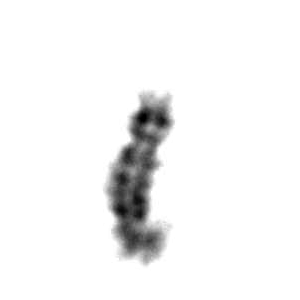

In [12]:
image['chr_05'][1] # 测试一下图像对象

#### 3.1.2.2. Training: Data Extraction from Images

#### - Training Set Data: 将图像对象转变为矩阵数值

In [13]:
data = {}
#rgb_data = {}

for chrNo in image.keys():
    data[chrNo] = []; 
    #rgb_data[chrNo] = []
    for case in image[chrNo]:
        grey, rgb = extractData(case)
        data[chrNo].append(grey)
        #rgb_data[chrNo].append(rgb)

In [14]:
array = {}

for chrNo in data.keys():
    array[chrNo] = []
    for case in data[chrNo]:            
        array[chrNo].append(case)

x_train_list = []
y_train_list = []

for y, x in array.items():    
    for x_item in x:
        x_train_list.append(x_item)
        y_train_list.append(y)
        
        # 将图像数据赋值给x_train_list;
        # 将标签数据赋值给y_train_list.

### 3.1.3. Assignment of Testing Data

#### 3.1.3.1. Testing: Image Object Assignment

In [15]:
# 方法同前面的Training Set

image = {}
i = 0

for chrNo in theWhole.keys():
    image[chrNo] = []
    for case in X_test_name[chrNo][str(iterationNumber)]: # Change here for different iterations!!!!!
        
        # 上面一行第二个中括号内为split的序号，0为第0次split分法
        
        img = Image.open(case)
        image[chrNo].append(img)

#### 3.1.3.2. Testing: Data Extraction from Images

In [16]:
data = {}
#rgb_data = {}

for chrNo in image.keys():
    data[chrNo] = []; 
    #rgb_data[chrNo] = []
    for case in image[chrNo]:
        grey, rgb = extractData(case)
        data[chrNo].append(grey)
        #rgb_data[chrNo].append(rgb)

In [17]:
array = {}

for chrNo in data.keys():
    array[chrNo] = []
    for case in data[chrNo]:            
        array[chrNo].append(case)

x_test_list = []
y_test_list = []

for y, x in array.items():    
    for x_item in x:
        x_test_list.append(x_item)
        y_test_list.append(y)

### 3.1.4. ChromConvert

In [18]:
chromConvert = {
               'chr_05': 0, 
               'chr_5_p14_deletion': 1
               }

In [19]:
chromConvert_reverse = {
                0: 'chr_05',
                1: 'chr_5_p14_deletion'
               }

In [20]:
# 将染色体序号和异常核型名称更换为序号，序号定义在程序开始部分

y_train_digital_list = []
for item in y_train_list:
    y_train_digital_list.append(chromConvert[item])
    
y_test_digital_list = []
for item in y_test_list:
    y_test_digital_list.append(chromConvert[item])

### 3.1.5. Change to Numpy Array

In [21]:
X_train = np.array(x_train_list)
y_train = np.array(y_train_digital_list)

In [22]:
X_test = np.array(x_test_list)
y_test = np.array(y_test_digital_list)

In [23]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
len(X_train)

238

In [ ]:
X_train[0].shape

(300, 300)

## 3.2. Convolutional Neural Network

### 3.2.1 Data Preparation

In [ ]:
X_train = X_train.reshape(-1, 300, 300, 1)
X_test = X_test.reshape(-1, 300, 300, 1)

### 3.2.3 Training Model Design

In [ ]:
model = Sequential()

In [ ]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(300, 300, 1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

In [ ]:
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(1024, activation='relu'))
model.add(Dense(2, activation='sigmoid'))

### 3.2.4. Tensorboard Initilization

In [ ]:
%load_ext tensorboard
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

### 3.2.5. Compile the modal

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

### 3.2.6. Fitting (拟合)

In [ ]:
model.fit(X_train, y_train, epochs=500, batch_size=64, verbose=1, 
          validation_data=(X_test, y_test),
          callbacks=[tensorboard_callback])

Epoch 1/500
4/4 [==============================] - 6s 820ms/step - loss: 1651.5658 - accuracy: 0.5924 - val_loss: 172.1169 - val_accuracy: 0.2821
Epoch 2/500
4/4 [==============================] - 1s 146ms/step - loss: 50.8272 - accuracy: 0.5168 - val_loss: 2.1179 - val_accuracy: 0.7179
Epoch 3/500
4/4 [==============================] - 0s 127ms/step - loss: 1.0620 - accuracy: 0.5924 - val_loss: 1.5062 - val_accuracy: 0.7179
Epoch 4/500
4/4 [==============================] - 0s 128ms/step - loss: 0.7875 - accuracy: 0.7269 - val_loss: 0.5444 - val_accuracy: 0.7949
Epoch 5/500
4/4 [==============================] - 1s 134ms/step - loss: 0.4975 - accuracy: 0.7605 - val_loss: 0.4483 - val_accuracy: 0.7949
Epoch 6/500
4/4 [==============================] - 1s 130ms/step - loss: 0.3060 - accuracy: 0.8992 - val_loss: 0.3962 - val_accuracy: 0.8462
Epoch 7/500
4/4 [==============================] - 1s 389ms/step - loss: 0.2196 - accuracy: 0.9286 - val_loss: 0.3283 - val_accuracy: 0.8718
Epoch 8

Epoch 58/500
4/4 [==============================] - 0s 126ms/step - loss: 4.1972e-06 - accuracy: 1.0000 - val_loss: 1.0496 - val_accuracy: 0.8462
Epoch 59/500
4/4 [==============================] - 1s 135ms/step - loss: 4.0345e-06 - accuracy: 1.0000 - val_loss: 1.0540 - val_accuracy: 0.8462
Epoch 60/500
4/4 [==============================] - 0s 128ms/step - loss: 3.8702e-06 - accuracy: 1.0000 - val_loss: 1.0586 - val_accuracy: 0.8462
Epoch 61/500
4/4 [==============================] - 0s 127ms/step - loss: 3.7129e-06 - accuracy: 1.0000 - val_loss: 1.0624 - val_accuracy: 0.8462
Epoch 62/500
4/4 [==============================] - 1s 130ms/step - loss: 3.5607e-06 - accuracy: 1.0000 - val_loss: 1.0669 - val_accuracy: 0.8462
Epoch 63/500
4/4 [==============================] - 1s 133ms/step - loss: 3.4294e-06 - accuracy: 1.0000 - val_loss: 1.0713 - val_accuracy: 0.8462
Epoch 64/500
4/4 [==============================] - 0s 128ms/step - loss: 3.2942e-06 - accuracy: 1.0000 - val_loss: 1.0746 -

4/4 [==============================] - 1s 145ms/step - loss: 9.0558e-07 - accuracy: 1.0000 - val_loss: 1.1926 - val_accuracy: 0.8462
Epoch 115/500
4/4 [==============================] - 1s 206ms/step - loss: 8.8805e-07 - accuracy: 1.0000 - val_loss: 1.1939 - val_accuracy: 0.8462
Epoch 116/500
4/4 [==============================] - 1s 144ms/step - loss: 8.7152e-07 - accuracy: 1.0000 - val_loss: 1.1957 - val_accuracy: 0.8462
Epoch 117/500
4/4 [==============================] - 1s 147ms/step - loss: 8.5449e-07 - accuracy: 1.0000 - val_loss: 1.1971 - val_accuracy: 0.8462
Epoch 118/500
4/4 [==============================] - 1s 148ms/step - loss: 8.4097e-07 - accuracy: 1.0000 - val_loss: 1.1992 - val_accuracy: 0.8462
Epoch 119/500
4/4 [==============================] - 1s 139ms/step - loss: 8.2494e-07 - accuracy: 1.0000 - val_loss: 1.2012 - val_accuracy: 0.8462
Epoch 120/500
4/4 [==============================] - 1s 142ms/step - loss: 8.1142e-07 - accuracy: 1.0000 - val_loss: 1.2027 - val_ac

Epoch 170/500
4/4 [==============================] - 1s 141ms/step - loss: 3.8117e-07 - accuracy: 1.0000 - val_loss: 1.2640 - val_accuracy: 0.8462
Epoch 171/500
4/4 [==============================] - 1s 134ms/step - loss: 3.7716e-07 - accuracy: 1.0000 - val_loss: 1.2650 - val_accuracy: 0.8462
Epoch 172/500
4/4 [==============================] - 1s 142ms/step - loss: 3.7165e-07 - accuracy: 1.0000 - val_loss: 1.2658 - val_accuracy: 0.8462
Epoch 173/500
4/4 [==============================] - 1s 132ms/step - loss: 3.6915e-07 - accuracy: 1.0000 - val_loss: 1.2664 - val_accuracy: 0.8462
Epoch 174/500
4/4 [==============================] - 1s 131ms/step - loss: 3.6364e-07 - accuracy: 1.0000 - val_loss: 1.2667 - val_accuracy: 0.8462
Epoch 175/500
4/4 [==============================] - 0s 127ms/step - loss: 3.6013e-07 - accuracy: 1.0000 - val_loss: 1.2676 - val_accuracy: 0.8462
Epoch 176/500
4/4 [==============================] - 1s 131ms/step - loss: 3.5412e-07 - accuracy: 1.0000 - val_loss: 1

Epoch 226/500
4/4 [==============================] - 1s 129ms/step - loss: 2.0686e-07 - accuracy: 1.0000 - val_loss: 1.3029 - val_accuracy: 0.8462
Epoch 227/500
4/4 [==============================] - 1s 129ms/step - loss: 2.0486e-07 - accuracy: 1.0000 - val_loss: 1.3036 - val_accuracy: 0.8462
Epoch 228/500
4/4 [==============================] - 0s 129ms/step - loss: 2.0386e-07 - accuracy: 1.0000 - val_loss: 1.3042 - val_accuracy: 0.8462
Epoch 229/500
4/4 [==============================] - 1s 129ms/step - loss: 2.0085e-07 - accuracy: 1.0000 - val_loss: 1.3049 - val_accuracy: 0.8462
Epoch 230/500
4/4 [==============================] - 0s 128ms/step - loss: 1.9985e-07 - accuracy: 1.0000 - val_loss: 1.3055 - val_accuracy: 0.8462
Epoch 231/500
4/4 [==============================] - 1s 130ms/step - loss: 1.9835e-07 - accuracy: 1.0000 - val_loss: 1.3060 - val_accuracy: 0.8462
Epoch 232/500
4/4 [==============================] - 1s 129ms/step - loss: 1.9685e-07 - accuracy: 1.0000 - val_loss: 1

### 3.2.7 Summary

In [ ]:
model.summary()

### 3.2.8. Tensorboard Display

In [ ]:
%tensorboard --logdir logs/fit

## 3.8 Save the Model

In [ ]:
model.save('saved_model/model_Chr_05_cnn_iteration_'+str(iterationNumber))

## 3.9 Load the Model

In [ ]:
model_reload = keras.models.load_model('saved_model/model_Chr_05_cnn_iteration_'+str(iterationNumber))

## 3.10. Performance Measures

### 3.10.0. Accuracy

In [ ]:
loss, acc = model_reload.evaluate(X_test, y_test, verbose=0)
print('Test Accuracy: %.3f' % acc)

In [ ]:
len(X_test)

In [ ]:
y_predict = model_reload.predict(X_test)

In [ ]:
len(y_predict)

In [ ]:
# The number 32 means the type number of all chromosome class number inlcuding abnormal ones
y_predict_filtered = []

for sample in y_predict:
    maximum = 0
    indicator = 0
    for i in range(2):
        if sample[i] > maximum:
            maximum = sample[i]
            indicator = i
    y_predict_filtered.append(indicator)        

In [ ]:
len(y_predict_filtered)

In [ ]:
label = ['chr_05', 'chr_5_p14_deletion']

label_convert = []

for i in range(2):
    label_convert.append(chromConvert_reverse[i])

### 3.10.1 Save y_test and y_predict

In [ ]:
with open('data_y_test_value_iteration_' + str(iterationNumber) + '.npy', 'wb') as file_y_test_value:
    np.save(file_y_test_value, y_test)

In [ ]:
with open('data_y_predict_value_iteration_' + str(iterationNumber) + '.npy', 'wb') as file_y_predict_value:
    np.save(file_y_predict_value, y_predict)

In [ ]:
with open('data_y_predict_filtered_value_iteration_' + str(iterationNumber) + '.npy', 'wb') as file_y_predict_filtered_value:
    np.save(file_y_predict_filtered_value, np.array(y_predict_filtered))

#### Test for load the files

In [ ]:
with open('data_y_test_value_iteration_' + str(iterationNumber) + '.npy', 'rb') as f1:
    y_test = np.load(f1)
    
with open('data_y_predict_value_iteration_' + str(iterationNumber) + '.npy', 'rb') as f2:
    y_predict = np.load(f2)
    
with open('data_y_predict_filtered_value_iteration_' + str(iterationNumber) + '.npy', 'rb') as f3:
    y_predict_filtered = np.load(f3)

In [ ]:
y_test

In [ ]:
y_predict

### 3.10.2. Classification Report

In [ ]:
performanceReport = classification_report(y_test, y_predict_filtered, target_names=label_convert)


print(performanceReport)

### 3.10.3. Confusion Matrix

In [ ]:
cm = np.array(confusion_matrix(y_test, y_predict_filtered, labels=[0, 1]))
confusion = pd.DataFrame(cm, index=label_convert,
                        columns=label_convert)
confusion.to_csv('ConfusionMatrix_Chr_05_KaryoType_CNN' + str(iterationNumber) + '.csv')
confusion

#### Heat Map

In [ ]:
plt.figure(figsize=(30, 24))
heat_map = sb.heatmap(confusion, annot=True,  # It's a Seaborn function
                      cmap='coolwarm', 
                      xticklabels=confusion.columns, yticklabels=confusion.index, 
                      linewidths=.5, 
                      annot_kws={"size": 20})
sb.set(font_scale = 2)

In [ ]:
fig = heat_map.get_figure()    
fig.savefig('Heatmap_Chr_05_Iteration_' + str(iterationNumber) + '.png', dpi=400)

### 3.10.4. ROC

In [ ]:
y_predict

In [ ]:
plt.plot(y_predict)

In [ ]:
y_predict_1D = y_predict[:,0]

In [ ]:
y_predict_1D_processed = 1- y_predict_1D

In [ ]:
fpr , tpr , thresholds = roc_curve(y_test , y_predict_1D_processed)
auc_rf = auc(fpr, tpr)

In [ ]:
auc_rf

In [ ]:
x = y = np.arange(0,1.1,0.1)

In [ ]:
x

In [ ]:
plt.plot(fpr, tpr)
plt.plot(x, y, '--', color='black')
plt.title('ROC curve of del(5)(p14)', fontsize=15, fontname = 'Times New Roman')
plt.xlabel('False Positive Rate', fontsize=10, fontname = 'Times New Roman')
plt.ylabel('True positive Rate', fontsize=10, fontname = 'Times New Roman')
plt.axis('equal')
plt.xlim(-0.08, 1.1)
plt.ylim(-0.08, 1.1)
plt.xticks(fontsize=10, fontname = 'Times New Roman')
plt.yticks(fontsize=10, fontname = 'Times New Roman')

plt.savefig('ROC_Curve_Chr_05_' + str(iterationNumber) + '.png', dpi=400)
plt.show()

#### 3.10.4.1 AUC Value

In [ ]:
auc_value = auc(fpr, tpr)

In [ ]:
print('AUC is ', auc_value)

# Results

In [ ]:
print('Test Accuracy: %.3f' % acc)

In [ ]:
print(performanceReport)

In [ ]:
type(performanceReport)

In [ ]:
confusion

In [ ]:
print('AUC is ', auc_value)

## Export to a text file

In [ ]:
file_report = open('Results'+str(iterationNumber)+'.txt', 'w')
file_report.write('Accuracy: %s\n\n' % acc)
file_report.write('AUC: %s.\n\n' % auc_value)
file_report.write('Performance Report: \n%s\n\n' % performanceReport)
file_report.write('Confusion Matrix: \n%s.\n\n' % confusion)
file_report.close()